<a href="https://colab.research.google.com/github/Shrey-Viradiya/DiveDeep/blob/master/Prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 3

In [ ]:
!nvidia-smi

Mon Jan 25 09:48:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Shrey Viradiya
### 18BCE259

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import sklearn.metrics

In [ ]:
def plot_image(image):
    plt.imshow(image.squeeze(), cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.squeeze(), interpolation="nearest")
    plt.axis("off")

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_labels = train_labels.reshape(-1, 1, 1, 10)
test_labels = test_labels.reshape(-1, 1, 1, 10)

valid_images, valid_labels, test_images, test_labels = test_images[0:1000], test_labels[0:1000], test_images[1000:], test_labels[1000:]

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([[[[0., 0., 0., ..., 0., 0., 0.]]],


       [[[1., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 1., 0.]]]], dtype=float32)

In [ ]:
train_labels.shape

(60000, 1, 1, 10)

In [ ]:
test_images.shape

(9000, 28, 28, 1)

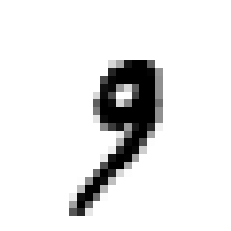

In [ ]:
plot_image(test_images[0])

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

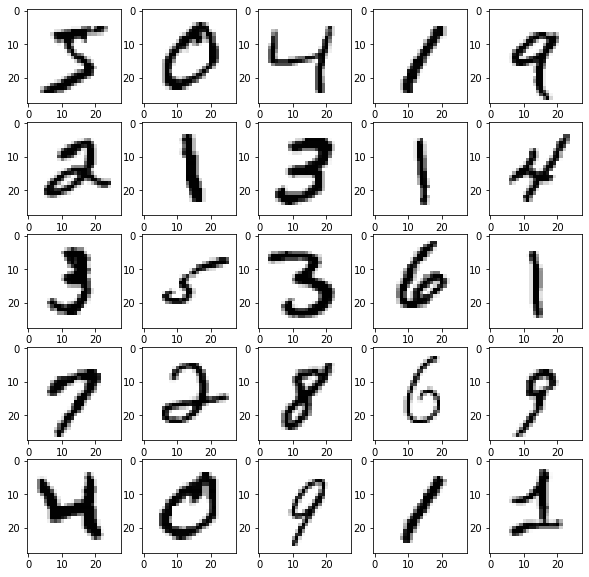

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(16, (4,4), activation = 'relu'),
    tf.keras.layers.Conv2D(10, (1,1), activation = 'softmax'),
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 32)          51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 16)          8208      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          170       
Total params: 60,250
Trainable params: 60,250
Non-trainable params: 0
____________________________________________________

In [ ]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(valid_images, valid_labels), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])

Epoch 1/30
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4541 - accuracy: 0.8531 - val_loss: 16.2300 - val_accuracy: 0.9600
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0631 - accuracy: 0.9813 - val_loss: 9.4361 - val_accuracy: 0.9750
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0430 - accuracy: 0.9861 - val_loss: 19.1847 - val_accuracy: 0.9570
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 15.9363 - val_accuracy: 0.9590
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 13.8784 - val_accuracy: 0.9730
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 21.0332 - val_accuracy: 0.9600
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 14.3989 - val_acc

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

282/282 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.9916

Test accuracy: 0.9915555715560913


In [ ]:
predictions = tf.squeeze(tf.argmax(model.predict(test_images), axis=-1))

In [ ]:
predictions.shape

TensorShape([9000])

In [ ]:
tf.squeeze(tf.argmax(test_labels, axis=-1))

<tf.Tensor: shape=(9000,), dtype=int64, numpy=array([9, 0, 2, ..., 4, 5, 6])>

In [ ]:
print(sklearn.metrics.accuracy_score(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))
print(sklearn.metrics.classification_report(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))
print(sklearn.metrics.confusion_matrix(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))

0.9915555555555555
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       891
           1       1.00      1.00      1.00      1010
           2       1.00      0.99      0.99       923
           3       0.99      0.99      0.99       909
           4       0.99      1.00      0.99       863
           5       0.99      0.99      0.99       801
           6       0.99      1.00      0.99       866
           7       0.99      0.99      0.99       934
           8       1.00      0.99      0.99       894
           9       0.98      0.99      0.99       909

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000

[[ 888    0    0    0    0    0    1    0    2    0]
 [   1 1005    0    0    0    0    2    2    0    0]
 [   1    1  912    2    2    0    0    2    1    2]
 [   0    1    0  898    0    6    0    0    1    3]
 [   0    

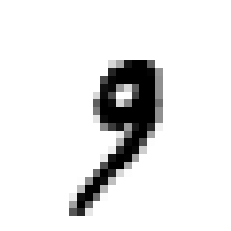

In [ ]:
plot_image(test_images[0])

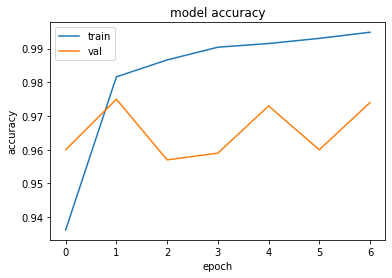

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()